# Семинар 3-4

## kNN

Алгоритм KNN является надежным и универсальным классификатором, который часто используется в качестве бейзлайна для более сложных классификаторов, таких как искусственные нейронные сети (ANN). Несмотря на свою простоту, KNN может превзойти более мощные классификаторы и используется во множестве приложений, таких как экономическое прогнозирование, сжатие данных и генетика. Например, KNN использовалась в [исследовании](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-S1-S11) по функциональной геномике в 2006 году, где гены определялись на основе их профилей экспрессии.

# Что такое алгоритм KNN?

Начнем с введения некоторых определений и обозначений.

* Мы будем использовать $x$ для обозначения вектора признаков (или атрибутов) объекта.
* Под $y$ мы будем подразумевать метку или класс, который мы пытаемся предсказать.

KNN входит в число **supervised** алгоритмов или алгоритмов "обучения с учителем".
Это означает, что нам предоставляется размеченный набор данных, для которого известны соответствия между наблюдениями $(x, y)$. Целью является на основе предоставляемой выборки найти связь между $x$ и $y$, чтобы восстановить функцию $h: X \rightarrow Y$. Имея такую функцию, мы можем предсказать $y$ по имеющемуся наблюдению $x$.

Обучение KNN заключается в запоминании экземпляров обучающей выборки, которые впоследствии используются как «знание» для фазы прогнозирования. Конкретно это означает, что только когда запрос в нашу базу данных сделан (т.е. когда мы просим KNN предсказать метку с учетом ввода), алгоритм будет использовать экземпляры обучения, чтобы выдать ответ.

Нужно понимать, что фаза обучения, заключающаяся в запоминании объектов выборки не является дорогостоящей по времени.
Однако этого нельзя сказать о фазе тестирования. Если база обучения достаточно большая, осуществление поиска по ней достаточно дорогостоящий процесс.


# Как KNN работает?

В случае классификации алгоритм K-ближайших соседей по существу сводится к подсчету большинства голосов между K наиболее похожими экземплярами для данного тестового экземпляра. Сходство экземпляров определяется по расстоянию между двумя точками данных. Популярным выбором является евклидово расстояние, но другие меры близости также могут быть подходящими для конкретной ситуации, включая расстояние Манхэттен, Чебышева и Хэмминга.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15, 6)
#размер для всех графиков

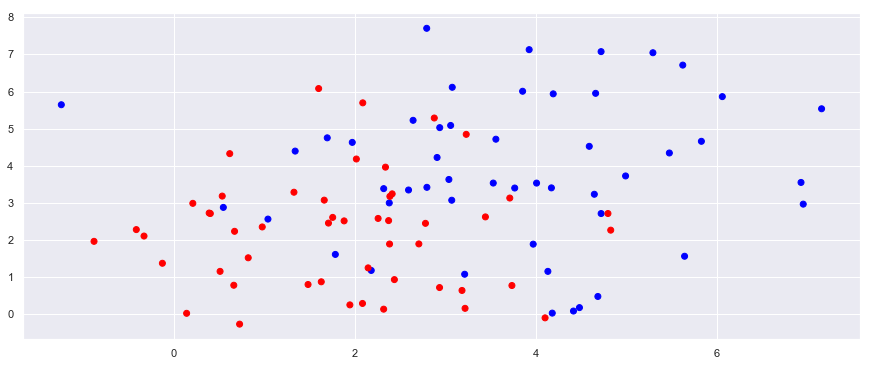

In [3]:
np.random.seed(42)
class0 = np.random.normal(4, 2, size=100).reshape(-1, 2)
class1 = np.random.normal(2, 1.5, size=100).reshape(-1, 2)
data = np.vstack((class0, class1))
target = np.hstack((np.zeros(len(class0)), np.ones(len(class1)))).astype(int)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='bwr')
plt.show()

`pip install mlxtend`

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data, target)

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=data, y=target, clf=knn, legend=2)
plt.show()

Попробуйте поменять параметр `n_neighbors` у классификатора kNN. Что получается, когда соседей очень мало? Когда очень много? Как меняется граница между классами?

## sklearn

Датасет: https://www.openml.org/d/31

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("dataset_31_credit-g.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X, y)

In [ ]:
df.dtypes

In [ ]:
df.select_dtypes(exclude=['object']).head()

In [ ]:
X = df.select_dtypes(exclude=['object'])
y = df['class']
knn.fit(X, y)

In [ ]:
knn.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, knn.predict(X))

Стоп. А все ли мы правильно делаем? Этому ответу вообще можно доверять?

В реальности нам вряд ли нужен алгоритм, который будет корректно классифицировать те же самые объекты, ответы для которых мы и так знаем. Поэтому в машинном обучении важно настраивать алгоритмы и оценивать их качество на разных выборках.

Однако откуда нам их взять, если выборка у нас всего одна?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
knn.fit(X_train, y_train)
accuracy_score(y_train, knn.predict(X_train))

In [ ]:
accuracy_score(y_test, knn.predict(X_test))

В данном случае мы оценивали качество не по всей выборке, а лишь по ее части. Как же оценить по всей?

**Кросс-валидация (Скользящий контроль)**

Контроль по $k$ блокам (**k-fold CV**): выборка случайным образом разбивается на $k$ непересекающихся блоков одинаковой (или почти одинаковой) длины. Затем на каждом шаге один из блоков используется для оценки качества, а остальные - для обучения.

<img src="https://codesachin.files.wordpress.com/2015/08/cv.png" width="400" align="center">

**Оценкой скользящего контроля** называется средняя по всем разбиениям величина ошибки на контрольных подвыборках.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

In [ ]:
# что будет, если увеличить число соседей? Попробуйте! (Менять от 5 до 200)
knn = KNeighborsClassifier(n_neighbors=200)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()

In [ ]:
knn.fit(X_train, y_train)
knn.predict(X_test)

In [ ]:
df['class'].value_counts()

In [ ]:
neighbors = np.arange(1, 201, 2)

scores_uni = []
scores_dis = []
kf = KFold(n_splits=5, random_state=42, shuffle=True)

for k in neighbors:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores_uni.append(cross_val_score(knn_uniform, X, y, cv=kf, scoring='accuracy').mean())
    scores_dis.append(cross_val_score(knn_distance, X, y, cv=kf, scoring='accuracy').mean())
    
plt.plot(neighbors, scores_uni, label='uniform')
plt.plot(neighbors, scores_dis, label='distance')
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 201, 2), 'weights': ['uniform', 'distance']}
clf = GridSearchCV(knn, params, cv=kf, scoring='accuracy')
clf.fit(X, y)
clf.best_params_, clf.best_score_

In [ ]:
categoricals = df.select_dtypes(include=['object']).columns
numerics = df.select_dtypes(include=['object']).columns
categoricals

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(df['checking_status'])

In [ ]:
encoder.classes_

In [ ]:
encoder.transform(df['checking_status'])[:10]

In [ ]:
encoder.inverse_transform(2)

In [ ]:
encoder.fit_transform(df['checking_status'])[:10]

# Задания для самостоятельной работы

1. Закодируйте категориальные признаки в исходной таблице `df` с помощью `LabelEncoder`.
2. Подберите оптимальные параметры `k` и `distance` для kNN. Какое качество показывает алгоритм?
3. Проделайте первый шаг, но с one-hot-кодированием (функция `get_dummies` из `pandas`). Повторите шаг 2. Что работает лучше? Выберите лучший с точки зрения результатов метод кодирования.
4. Сравните способы масштабирования `MinMaxScaler` и `StandardScaler` друг с другом, и проделайте для полученных данных шаг 2 еще раз. Какое получилось качество?

_(набор заданий считается сделанным, если итоговое качество превышает 0.72)_

In [ ]:
# (ﾉ◕ヮ◕)ﾉ*:･ﾟ✧ ✧ﾟ･: *ヽ(◕ヮ◕ヽ)